In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [38]:
# Function to convert an image to a binary grid
def image_to_binary_grid(image_path, grid_size=(20, 20), threshold_ratio=0.5):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to the specified grid size
    resized_image = cv2.resize(image, grid_size, interpolation=cv2.INTER_AREA)
    
    # Normalize the image (optional, but helps in setting a consistent threshold)
    normalized_image = resized_image / 255.0
    
    # Calculate the threshold based on the mean pixel value
    threshold = threshold_ratio * np.max(normalized_image)
    
    # Convert to binary grid: 1 if pixel value > threshold, else 0
    binary_grid = (normalized_image > threshold).astype(int)
    
    return binary_grid


In [39]:
# Function to load dataset and convert images to binary grids
def load_dataset(data_dir, grid_size=(20, 20)):
    labels = {'tamil': 0, 'telugu_kannada': 1, 'sanskrit': 2}
    data = []
    target = []
    
    for label in labels.keys():
        class_dir = os.path.join(data_dir, label)
        for filename in os.listdir(class_dir):
            if filename.endswith('.png'):
                image_path = os.path.join(class_dir, filename)
                binary_grid = image_to_binary_grid(image_path, grid_size)
                data.append(binary_grid.flatten())
                target.append(labels[label])
                
    data = np.array(data)
    target = np.array(target)
    
    return data, target

In [40]:
# Load and preprocess the dataset
data_dir = 'dataset/'  # Replace with the actual path to your dataset
data, target = load_dataset(data_dir, grid_size=(20, 20))
data = data.astype('float32')
target = to_categorical(target, num_classes=3)

In [41]:
# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(data, target, test_size=0.2, random_state=42)


In [42]:
# Build the Neural Network Model
model = Sequential([
    Dense(64, input_dim=400, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Tamil, Telugu/Kannada, Sanskrit
])

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step - accuracy: 0.2143 - loss: 1.1711 - val_accuracy: 0.0000e+00 - val_loss: 1.3096
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5000 - loss: 0.9931 - val_accuracy: 0.0000e+00 - val_loss: 1.3188
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4286 - loss: 0.9441 - val_accuracy: 0.0000e+00 - val_loss: 1.3121
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5714 - loss: 0.8877 - val_accuracy: 0.0000e+00 - val_loss: 1.2208
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6429 - loss: 0.8497 - val_accuracy: 0.0000e+00 - val_loss: 1.1978
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7857 - loss: 0.8031 - val_accuracy: 0.0000e+00 - val_loss: 1.2048
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7857 - loss: 0.7469 - val_accuracy: 0.0000e+00 - val_loss: 1.2437
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7857 - loss: 0.69

In [45]:
# Evaluate the Model
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7500 - loss: 2.7561
Validation accuracy: 75.00%


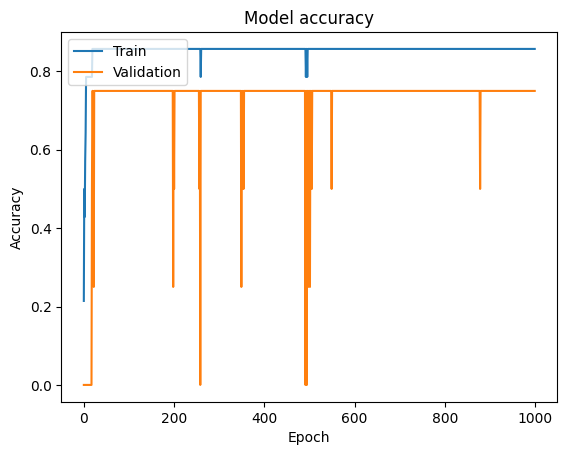

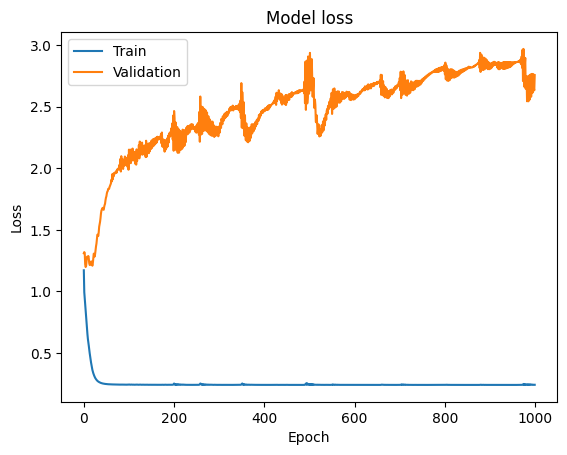

In [46]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:
# Predict on New Images
def predict_image(image_path):
    # Convert the image to a binary grid
    binary_grid = image_to_binary_grid(image_path, grid_size=(20, 20)).flatten().astype('float32')
    binary_grid = np.expand_dims(binary_grid, axis=0)  # Add batch dimension
    
    # Predict the class
    prediction = model.predict(binary_grid)
    class_idx = np.argmax(prediction)
    
    # Map class index to class name
    class_names = {0: 'Tamil', 1: 'Telugu/Kannada', 2: 'Sanskrit'}
    predicted_class = class_names[class_idx]
    
    print(f'The letter is in {predicted_class}')

In [48]:
# Example usage
image_path = r'D:\6TH SEM\bio optimized\New folder\tamiltest.png'  # Replace with the actual path to your image
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The letter is in Tamil
